<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/deep_autoencoder_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from keras.models import Model, Sequential
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.layers import Input, Dense

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train.shape, x_test.shape

170500096/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [4]:
x_test[0][0][0]

array([158, 112,  49], dtype=uint8)

## Normalização dos dados

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
x_train[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [7]:
x_test[0][0][0]

array([0.61960787, 0.4392157 , 0.19215687], dtype=float32)

In [8]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [9]:
entradas = (32 * 32 * 3)
entradas

3072

In [10]:
x_train = x_train.reshape(x_train.shape[0], entradas)
x_test = x_test.reshape(x_test.shape[0], entradas)
x_train.shape, x_test.shape

((50000, 3072), (10000, 3072))

In [11]:
model = Sequential()

### Encoder

In [12]:
model.add(Dense(units = 1536, activation = 'relu', input_dim = entradas))
model.add(Dense(units = 768, activation = 'relu'))
model.add(Dense(units = 384, activation = 'relu'))
model.add(Dense(units = 192, activation = 'relu'))

### Decoder

In [13]:
model.add(Dense(units = 384, activation = 'relu'))
model.add(Dense(units = 768, activation = 'relu'))
model.add(Dense(units = 1536, activation = 'relu'))
model.add(Dense(units = entradas, activation = 'sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1536)              4720128   
_________________________________________________________________
dense_1 (Dense)              (None, 768)               1180416   
_________________________________________________________________
dense_2 (Dense)              (None, 384)               295296    
_________________________________________________________________
dense_3 (Dense)              (None, 192)               73920     
_________________________________________________________________
dense_4 (Dense)              (None, 384)               74112     
_________________________________________________________________
dense_5 (Dense)              (None, 768)               295680    
_________________________________________________________________
dense_6 (Dense)              (None, 1536)              1

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_ = model.fit(x_train, x_train,
                     epochs = 100, batch_size = 256,
                     validation_data = (x_test, x_test))

In [17]:
np.mean(history_.history['accuracy'])

0.008517200011992828

In [18]:
np.mean(history_.history['val_accuracy'])

0.008118000007234514

In [19]:
dimensao_original = Input(shape = (entradas, ))
camada_encoder0 = model.layers[0]
camada_encoder1 = model.layers[1]
camada_encoder2 = model.layers[2]
camada_encoder3 = model.layers[3]

In [20]:
encoder = Model(dimensao_original,
                camada_encoder3(camada_encoder2(camada_encoder1(camada_encoder0(dimensao_original)))))

encoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 1536)              4720128   
_________________________________________________________________
dense_1 (Dense)              (None, 768)               1180416   
_________________________________________________________________
dense_2 (Dense)              (None, 384)               295296    
_________________________________________________________________
dense_3 (Dense)              (None, 192)               73920     
Total params: 6,269,760
Trainable params: 6,269,760
Non-trainable params: 0
_________________________________________________________________


In [21]:
imagens_codificadas = encoder.predict(x_test)
imagens_decodificadas = model.predict(x_test)
imagens_codificadas.shape, imagens_decodificadas.shape

((10000, 192), (10000, 3072))

In [22]:
numero_imagens = 10
imagens_teste = np.random.randint(x_test.shape[0], size = numero_imagens)
imagens_teste.shape

(10,)

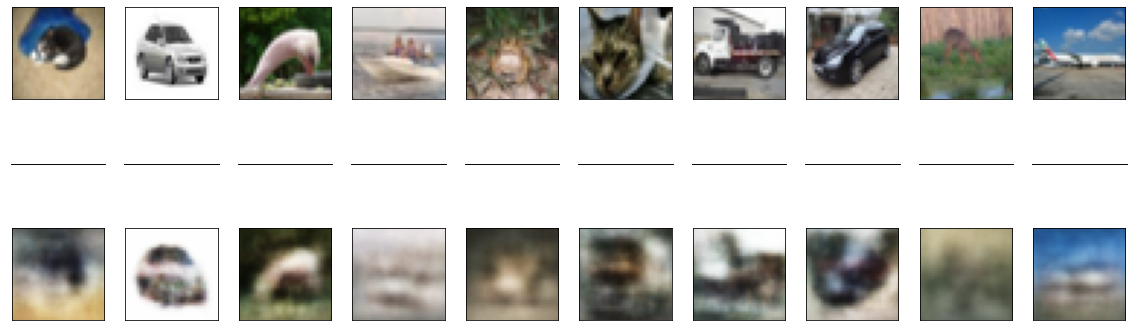

In [23]:
plt.figure(figsize = (20,20))

for i, indice_imagem in enumerate(imagens_teste):
  #Imagem original
  eixo = plt.subplot(10,10, i + 1)
  plt.imshow(x_test[indice_imagem].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())

  #Imagem codificada
  eixo = plt.subplot(10,10, i + 1 + numero_imagens)
  a = np.expand_dims(imagens_decodificadas[indice_imagem], axis = 0)
  plt.imshow(a)
  plt.xticks(())
  plt.yticks(())

  #Imagem reconstruída
  eixo = plt.subplot(10,10, i + 1 + numero_imagens * 2)
  plt.imshow(imagens_decodificadas[indice_imagem].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())